In [1]:
import numpy as np
from numpy import sin, pi, abs
from scipy.integrate import dblquad, trapz,quad
import matplotlib.pyplot as plt
from Data import Data
import torch

In [3]:
data_set = Data(128)
x, y = data_set.get()
print (type(x))

<class 'torch.Tensor'>


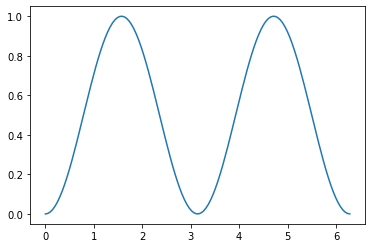

In [4]:
plt.plot(x, y)

In [5]:
I = trapz(y.T ,x.T)
print (I)
print (type(I))

[3.1415925]
<class 'numpy.ndarray'>


In [5]:
# test the third term
I_test = torch.trapz(y.T,x.T)
print (I_test)
print (type(I_test))
avg = torch.mean(y * x)  # this equation is wrong
print(avg)

tensor([3.1416])
<class 'torch.Tensor'>
tensor(1.5585)


In [6]:
# test the second term
# theta = np.linspace(0, 2*np.pi, 100)
# theta_prime = np.linspace(0, 2*np.pi, 100)
F = lambda theta, theta_prime: sin(theta)**2 * \
                               sin(theta_prime)**2 * abs(sin(theta - theta_prime))



In [8]:
dblquad(F, 0, 2*pi, lambda x: 0, lambda x: 2*pi)

(5.2359877537509005, 1.9544067031418422e-08)

In [14]:
data_set = Data(1000)
x, y = data_set.get()
matrix = data_set.matrix()
print (matrix.size())

# second_term = (4*pi**2/128**2)*torch.mm(torch.mm(y.T, matrix), y)
# print(second_term)

torch.Size([1000, 1000])


In [16]:
(4*pi**2/1000**2) * torch.mm(torch.mm(y.T, matrix), y)

tensor([[5.2255]])

In [4]:
# check first term
entropy = lambda theta: sin(theta)**2 * np.log(sin(theta)**2)
quad(entropy, 0, 2*pi)

(-1.2135795270174112, 7.007086022525755e-10)

In [11]:
data_set = Data(128)
_,y = data_set.get()
print (y.size())

torch.Size([128, 1])


In [12]:
(2*pi/len(y))*torch.mm(y.T, torch.log(y))

tensor([[-1.2041]])

In [3]:
# compare the vectorization and trapz

data_set = Data(128)
x,y = data_set.get()
x = x.numpy()
y = y.numpy()

In [5]:
f = y * np.log(y)
I = trapz(f.T,x.T)
print (I)

[-1.2135761]


In [9]:
vac = (2*pi/len(y)) * np.dot(y.T, np.log(y))
print (vac)

[[-1.204095]]


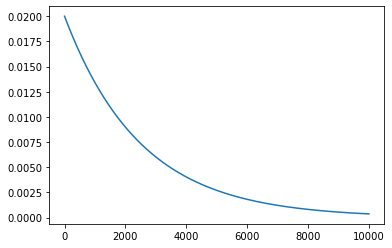

In [18]:
# test lr decay
ep = np.arange(0, 10000, 1)
lr = 0.02 * 0.9996**ep
plt.plot(ep, lr)

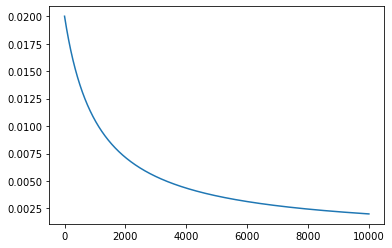

In [15]:
lr1 = 0.02 * (1 / (1 + 0.0009 * ep))
plt.plot(ep, lr1)